<a href="https://colab.research.google.com/github/Srinivas-Dasathwar/Fake-News-Detection/blob/main/Fake_News_Detection_Model_using_TensorFlow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library Imports


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

##Exploring Fake News

In [7]:
fake = pd.read_csv('Fake.csv')

In [8]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [10]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

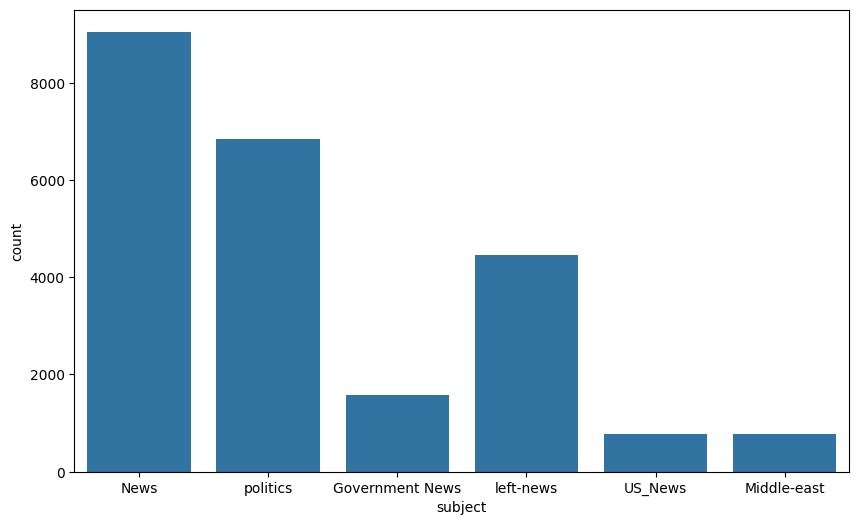

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'subject',data = fake)

##WordCloud

In [16]:
text = ' '.join(fake['text'].tolist())

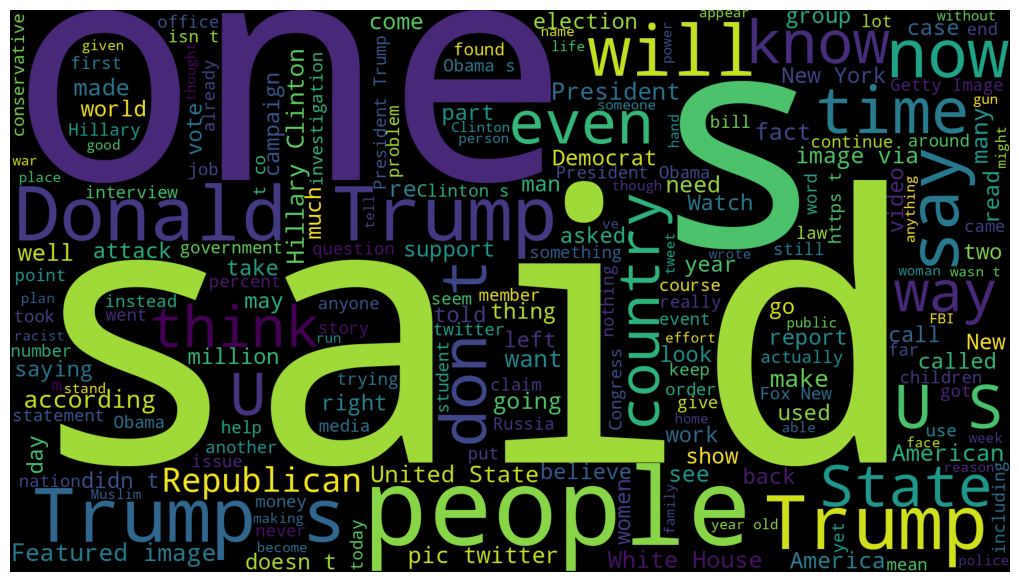

In [19]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

##Exploring Rea News

In [20]:
real = pd.read_csv('True.csv')

In [21]:
text = ' '.join(real['text'].tolist())

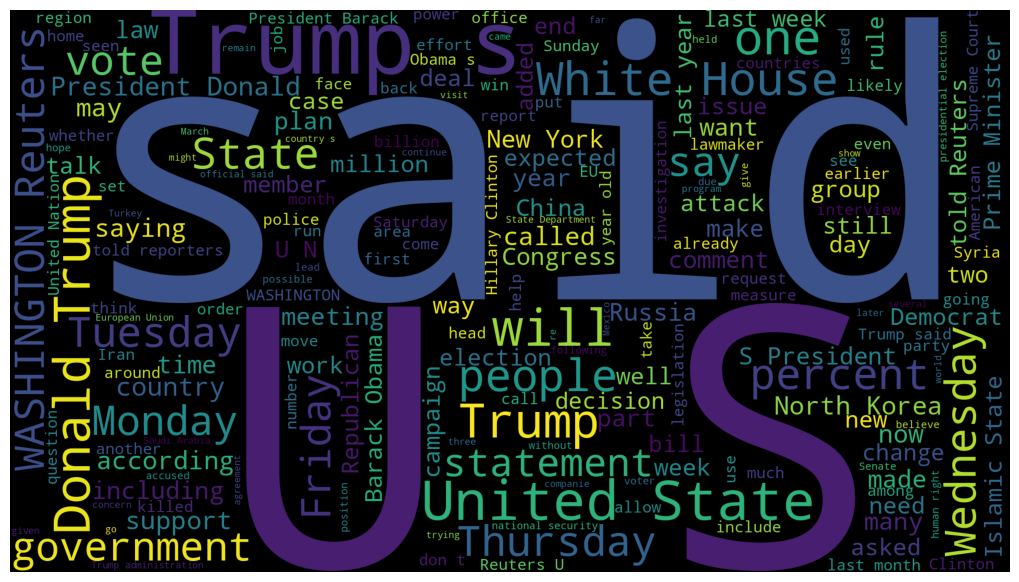

In [22]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [23]:
real.sample(5)

,title,text,subject,date
12561,"Putin, Egypt's Sisi discuss restart of flights...",CAIRO (Reuters) - Russian President Vladimir P...,worldnews,"December 11, 2017"
7793,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...,politicsNews,"October 17, 2016"
10041,California bill to fight fashion models' eatin...,"SACRAMENTO, Calif. (Reuters) - A California bi...",politicsNews,"April 7, 2016"
19048,Turnout high as Iraqi Kurds defy threats to ho...,"ERBIL/SULAIMANIYA, Iraq (Reuters) - Kurds vote...",worldnews,"September 25, 2017"
20018,Japan PM says U.N. sanctions on North Korea mu...,TOKYO (Reuters) - Japanese Prime Minister Shin...,worldnews,"September 15, 2017"


In [49]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [50]:
len(unknown_publishers)

222

In [51]:
real.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [52]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [53]:
real.drop(8970, axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [55]:
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [56]:
real['publisher'] = publisher
real['text'] = tmp_text

In [58]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [59]:
real.shape

(21417, 5)

In [61]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [62]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [63]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [64]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

##Preprocessing Text

In [65]:
real['class'] = 1
fake['class'] = 0

In [66]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [67]:
real = real[['text','class']]

In [68]:
fake = fake[['text','class']]

In [75]:
import pandas as pd
data = pd.concat([real, fake], ignore_index=True)

In [76]:
data.sample(5)

,text,class
29162,house republicans just spit on the grave of a...,0
8907,lynch says meeting with bill clinton 'casts a ...,1
23764,robert reich perfectly breaks down trump’s 10...,0
10235,senate proposal on encryption gives judges bro...,1
41639,“allahu akbar” muslim extremists forced cathol...,0


In [77]:
# https://github.com/laxmimerit/preprocess_kgptalkie_old

In [79]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 14.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by sele

In [81]:
!pip install matplotlib-venn

In [82]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [87]:
!pip install libarchive
import libarchive

  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl.metadata (1.7 kB)
Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (libarchive)


ModuleNotFoundError: No module named 'libarchive'

In [88]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl.metadata (1.7 kB)
Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (libarchive)


ModuleNotFoundError: No module named 'libarchive'

In [89]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [85]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.2 MB/s eta 0:00:00


In [91]:
!pip install googletrans==3.1.0a0
import preprocess_kgptalkie as ps

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=2eeec7ca300d813d44613d39e1f38c47bea2003026ee1931eda1d20a72f63b66
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [92]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [93]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


##Vectorization -- Word2Vec

In [94]:
import gensim

In [95]:
y = data['class'].values

In [103]:
X = [d.split() for d in data['text'].tolist()]

In [104]:
type(X)

list

In [105]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [107]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [109]:
len(w2v_model.wv.key_to_index)

230893

In [112]:
w2v_model.wv['love']

array([-1.2718835e+00,  3.4458058e+00,  2.4085312e+00, -3.5977960e+00,
        1.8924038e+00, -6.9221395e-01,  2.6648858e-01,  4.1467115e-01,
       -1.0148876e+00,  2.3652408e+00,  1.2023522e+00, -7.3724061e-01,
       -3.2265701e+00,  4.1084084e-01, -9.8012984e-01,  8.0532551e-01,
       -2.0492840e+00,  1.3867950e+00,  1.7065649e+00, -1.0578283e+00,
       -3.3882489e+00,  2.1648037e+00, -1.0794947e+00,  2.4327161e+00,
       -3.6561115e+00,  4.5591559e+00,  1.8578262e+00, -1.3761894e+00,
        4.5057288e-01, -1.2499220e+00,  2.5850966e+00, -1.5694668e+00,
        8.6476183e-01, -2.3955649e-01, -1.4631531e+00,  2.4280131e+00,
        6.8288249e-01,  4.4561531e-03,  2.2078300e+00, -3.1056249e+00,
       -7.5862378e-01, -4.9434276e+00, -5.1565890e+00, -5.0480276e-01,
       -1.3861457e+00, -2.3184958e+00,  1.0641496e+00, -2.8598087e+00,
       -1.4814507e+00, -1.3621237e+00, -9.2239261e-01,  1.0991452e+00,
        3.6127439e+00, -4.1065416e+00,  8.7411618e-01,  4.2845792e-01,
      

In [115]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7103775143623352),
 ('malaysia', 0.6694645881652832),
 ('beijings', 0.6597995162010193),
 ('thailand', 0.632118284702301),
 ('australia', 0.6249105334281921),
 ('indias', 0.6223365664482117),
 ('indian', 0.6222531795501709),
 ('chokepoints', 0.6199072599411011),
 ('china', 0.6109625101089478),
 ('indonesia', 0.5935059785842896)]

In [116]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [117]:
X = tokenizer.texts_to_sequences(X)

In [119]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

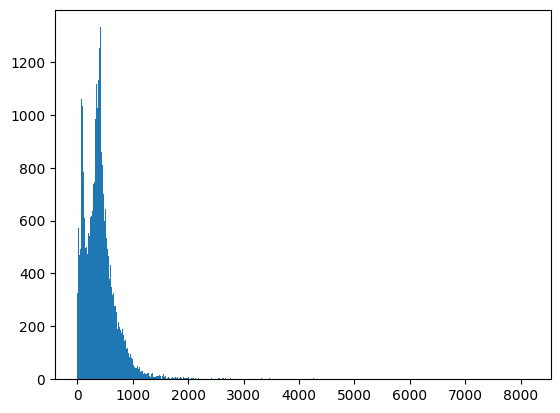

In [121]:
plt.hist([len(x) for x in X],bins = 700)
plt.show()

In [122]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1587

In [124]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [125]:
len(X[101])

1000

In [126]:
vocab_size = len(tokenizer.word_index) + 1

In [129]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in tokenizer.word_index.items(): # Use tokenizer.word_index instead of vocab
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [130]:
embedding_vectors = get_weight_matrix(w2v_model)

In [131]:
embedding_vectors.shape

(230894, 100)

In [132]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [133]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      23,089,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,089,400 (88.08 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,089,400 (88.08 MB)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [135]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - acc: 0.9191 - loss: 0.2022 - val_acc: 0.9622 - val_loss: 0.1085
Epoch 2/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - acc: 0.9782 - loss: 0.0647 - val_acc: 0.9726 - val_loss: 0.0834
Epoch 3/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - acc: 0.9825 - loss: 0.0528 - val_acc: 0.9866 - val_loss: 0.0328
Epoch 4/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - acc: 0.9899 - loss: 0.0298 - val_acc: 0.9917 - val_loss: 0.0240
Epoch 5/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - acc: 0.9933 - loss: 0.0203 - val_acc: 0.9932 - val_loss: 0.0192
Epoch 6/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - acc: 0.9980 - loss: 0.0065 - val_acc: 0.9937 - val_loss: 0.0205


In [136]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [137]:
accuracy_score(y_test, y_pred)

0.9944766146993318

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5830
           1       0.99      0.99      0.99      5395

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [140]:
x = ['this is a news']

In [141]:
X_test

array([[   0,    0,    0, ...,  515, 1395,  703],
       [   0,    0,    0, ..., 2219,  175, 9686],
       [   0,    0,    0, ...,   19, 3878, 5683],
       ...,
       [   0,    0,    0, ..., 2104,  175, 2138],
       [   0,    0,    0, ..., 7684, 7714,  264],
       [   0,    0,    0, ...,   18,  105,   71]], dtype=int32)

In [146]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [147]:
(model.predict(x) >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0]])

In [150]:
x = ['In his novel The Plague, Albert Camus writes, “There have been as many plagues as wars in history; yet always plagues and wars take people equally by surprise.” In the face of yet another global public health crisis, let us hope that we are not taken by surprise like with the Covid-19 pandemic.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[1]])